In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pylab
import matplotlib.hatch
from matplotlib.patches import Polygon

In [7]:
# Add hatches needed for bar plots



triangle = Polygon(
    [[-0.3, -0.4], [0.3, -0.4], [0., 0.1]],
    closed=True, fill=False).get_path()

# Triangle hatch to use with the identifier 't'
class TriangleHatch(matplotlib.hatch.Shapes):
    filled = False
    size = 1.0
    path = triangle

    def __init__(self, hatch, density):
        self.num_rows = (hatch.count('t')) * density
        self.shape_vertices = self.path.vertices
        self.shape_codes = self.path.codes
        matplotlib.hatch.Shapes.__init__(self, hatch, density)
        
        

revTriangle = Polygon(
    [[-0.3, 0.1], [0.3, 0.1], [0., -0.4]],
    closed=True, fill=False).get_path()        
        
# Triangle hatch to use with the identifier 'v'
class RevTriangleHatch(matplotlib.hatch.Shapes):
    filled = False
    size = 1.0
    path = revTriangle

    def __init__(self, hatch, density):
        self.num_rows = (hatch.count('v')) * density
        self.shape_vertices = self.path.vertices
        self.shape_codes = self.path.codes
        matplotlib.hatch.Shapes.__init__(self, hatch, density)
        
        
        
square = Polygon(
    [[-0.3, -0.3], [0.3, -0.3], [0.3, 0.3], [-0.3, 0.3]],
    closed=True, fill=False).get_path()

# Square hatch to use with the identifier 's'
class SquareHatch(matplotlib.hatch.Shapes):
    filled = False
    size = 1.0
    path = square

    def __init__(self, hatch, density):
        self.num_rows = (hatch.count('s')) * density
        self.shape_vertices = self.path.vertices
        self.shape_codes = self.path.codes
        matplotlib.hatch.Shapes.__init__(self, hatch, density)
        
        
            
diamond = Polygon(
    [[0, 0], [0.2, 0.3], [0, 0.6], [-0.2, 0.3]],
    closed=True, fill=False).get_path()

# Diamond hatch to use with the identifier 'd'
class DiamondHatch(matplotlib.hatch.Shapes):
    filled = False
    size = 1.0
    path = diamond

    def __init__(self, hatch, density):
        self.num_rows = (hatch.count('d')) * density
        self.shape_vertices = self.path.vertices
        self.shape_codes = self.path.codes
        matplotlib.hatch.Shapes.__init__(self, hatch, density)

        
              
matplotlib.hatch._hatch_types.append(TriangleHatch)
matplotlib.hatch._hatch_types.append(RevTriangleHatch)
matplotlib.hatch._hatch_types.append(SquareHatch)
matplotlib.hatch._hatch_types.append(DiamondHatch)

# Create dataframes that have been collected separately

This should be executed only if new data has been collected. Do __not__ run this cell every time.

In [22]:
dfList = []
for l in [25,50,75,100]:
    for d in [3,6,12]:
        for s in ['petclinic', 'broadleaf', 'webgoat', 'ts-security-service', 'openmrs']:
            dfList.append(pd.read_csv('./results/javaAP_results/original/results_'+str(l)+'-'+str(d)+'_'+str(s)+'.csv'))

pd.concat(dfList).to_csv('./results/original.csv', index=False)

dfList = []
for l in [25,50,75,100]:
    for d in [3,6,12]:
        for s in ['openmrs']:
            dfList.append(pd.read_csv('./results/javaAP_results/refactored/results_'+str(l)+'-'+str(d)+'_'+str(s)+'.csv'))

pd.concat(dfList).to_csv('./results/refactored.csv', index=False)

del dfList

# Load dataframes

In [8]:
# dfOrig1 = pd.read_csv('./results/original_all.csv')
# dfOrig2 = pd.read_csv('./results/trainticket_10services.csv')
# dfOrig2 = dfOrig2[dfOrig2['system'] == 'ts-security-service']
# dfOrig = pd.concat([dfOrig1, dfOrig2])

dfOrig = pd.read_csv('./results/original.csv')
dfRef = pd.read_csv('./results/refactored.csv')

# Results from original systems

In [9]:
# General parameters
FOLDER_IMG = './images/'
CLASS_NAME = ['PetClinic', 'Broadleaf', 'WebGoat', 'ts-security-service', 'OpenMRS']
SYSTEMS = ['petclinic', 'broadleaf', 'webgoat', 'ts-security-service', 'openmrs']
COLORS = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
STYLES = ['-o', '-^', '-v', '-s', '-d']
SIZES = [20, 20, 20, 20, 20]
LEGENDSIZE = 30
FONT_SIZE = 14

# Time Analysis

In [39]:
tot = 0
counter = 0
for s in SYSTEMS:
    totSys = 0
    print('### ' + s + ' ###')
    for l in [25, 50, 75, 100]:
        for d in [3, 6, 12]:
            t = 0
            dfTmp = dfOrig[(dfOrig['load']==l) & (dfOrig['duration']==d) & (dfOrig['system']==s)]
            t += dfTmp[(dfTmp['type']=='CTH') & (dfTmp['countTh']==5) & (dfTmp['cpuTh']==10) & (dfTmp['option']=='average')]['time'].iloc[0]
            t += dfTmp[(dfTmp['type']=='EP') & (dfTmp['methodTimeTh']==5)]['time'].iloc[0]
            t += dfTmp[(dfTmp['type']=='WCS') & (dfTmp['memoryUsageTh']==5)]['time'].iloc[0]
            t += dfTmp[(dfTmp['type']=='BLOB') & (dfTmp['numMsgs']==5) & (dfTmp['cpuTh']==10) & (dfTmp['heapTh']==10)]['time'].iloc[0]
            t += dfTmp[(dfTmp['type']=='TOB') & (dfTmp['methodTimeTh']==5)]['time'].iloc[0]
            print(str(l) + '-' + str(d) + ' = {:.1f} sec'.format(t/1000))
            totSys += t
            tot += t
            counter += 1
    print('Average Time = {:.1f} sec'.format((totSys/12)/1000))
    print()
print('Total Average Time = {:.1f} sec'.format((tot/counter)/1000))

### petclinic ###
25-3 = 0.5 sec
25-6 = 0.6 sec
25-12 = 8.2 sec
50-3 = 8.1 sec
50-6 = 7.9 sec
50-12 = 8.2 sec
75-3 = 0.5 sec
75-6 = 8.0 sec
75-12 = 7.9 sec
100-3 = 7.7 sec
100-6 = 7.4 sec
100-12 = 7.2 sec
Average Time = 6.0 sec

### broadleaf ###
25-3 = 1.4 sec
25-6 = 1.6 sec
25-12 = 2.1 sec
50-3 = 1.5 sec
50-6 = 1.9 sec
50-12 = 2.3 sec
75-3 = 1.4 sec
75-6 = 2.0 sec
75-12 = 2.4 sec
100-3 = 1.5 sec
100-6 = 1.9 sec
100-12 = 2.5 sec
Average Time = 1.9 sec

### webgoat ###
25-3 = 6.5 sec
25-6 = 7.4 sec
25-12 = 8.0 sec
50-3 = 8.0 sec
50-6 = 8.0 sec
50-12 = 8.0 sec
75-3 = 7.8 sec
75-6 = 7.9 sec
75-12 = 8.0 sec
100-3 = 7.7 sec
100-6 = 7.5 sec
100-12 = 7.3 sec
Average Time = 7.7 sec

### ts-security-service ###
25-3 = 0.4 sec
25-6 = 0.6 sec
25-12 = 0.6 sec
50-3 = 0.4 sec
50-6 = 0.6 sec
50-12 = 0.6 sec
75-3 = 0.5 sec
75-6 = 0.6 sec
75-12 = 0.6 sec
100-3 = 0.6 sec
100-6 = 0.7 sec
100-12 = 0.7 sec
Average Time = 0.6 sec

### openmrs ###
25-3 = 0.5 sec
25-6 = 0.4 sec
25-12 = 0.6 sec
50-3 = 0.4 sec

## Legend for the paper

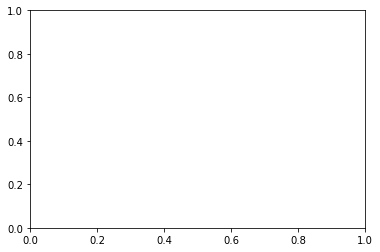

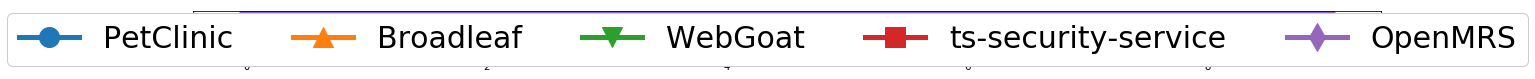

In [7]:
# The figure plotted when this cell is executed is not important.
# Please, look for the legend that is created at the specified path.

numClasses = len(SYSTEMS)
xList = range(10)

fig = pylab.figure()
figlegend = pylab.figure(figsize=(21.3,0.8))
ax = fig.add_subplot(111)
for idx in range(numClasses):
    plt.plot(xList, [idx]*len(xList), STYLES[idx], lw=5, color=COLORS[idx], label=CLASS_NAME[idx], markersize=SIZES[idx])
figlegend.legend(loc='center', ncol=numClasses, fontsize=LEGENDSIZE, facecolor='white', framealpha=1)
#fig.show()
figlegend.savefig(FOLDER_IMG + 'legend.png')

## CTH

In [6]:
AP = 'CTH'

COUNT_TH = 5
CPU_TH = 10
OPTION = 'average'

for SYSTEM in SYSTEMS:
    print('### ' + SYSTEM + ' ###')
    for LOAD in [25, 50, 75, 100]:
        for DURATION in [3, 6, 12]:
            dfTmp = dfOrig[(dfOrig['load']==LOAD) &
                       (dfOrig['duration']==DURATION) &
                       (dfOrig['type']==AP) &
                       (dfOrig['system']==SYSTEM) &
                       (dfOrig['countTh']==COUNT_TH) &
                       (dfOrig['cpuTh']==CPU_TH) &
                       (dfOrig['option']==OPTION)
                      ]
            print(str(LOAD) + '-' + str(DURATION) + ' = ' + str(dfTmp['foundAP'].iloc[0]))

### broadleaf ###
25-3 = 1
25-6 = 1
25-12 = 0
50-3 = 1
50-6 = 1
50-12 = 1
75-3 = 2
75-6 = 1
75-12 = 3
100-3 = 3
100-6 = 2
100-12 = 1
### openmrs ###
25-3 = 2
25-6 = 0
25-12 = 0
50-3 = 0
50-6 = 0
50-12 = 0
75-3 = 1
75-6 = 1
75-12 = 0
100-3 = 0
100-6 = 0
100-12 = 0
### petclinic ###
25-3 = 1
25-6 = 2
25-12 = 2
50-3 = 1
50-6 = 2
50-12 = 2
75-3 = 1
75-6 = 1
75-12 = 1
100-3 = 1
100-6 = 0
100-12 = 1
### webgoat ###
25-3 = 3
25-6 = 3
25-12 = 4
50-3 = 4
50-6 = 4
50-12 = 4
75-3 = 3
75-6 = 4
75-12 = 4
100-3 = 4
100-6 = 4
100-12 = 4
### ts-security-service ###
25-3 = 1
25-6 = 1
25-12 = 1
50-3 = 1
50-6 = 1
50-12 = 1
75-3 = 1
75-6 = 1
75-12 = 1
100-3 = 1
100-6 = 1
100-12 = 1


/home/riccardo/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/riccardo/.local/lib/python3.8/site-packages/matplotlib/axes/_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/riccardo/.local/lib/python3.8/site-packages/matplotlib/axes/_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


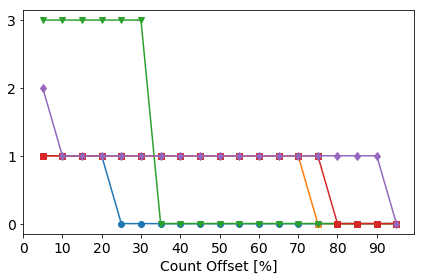

#countTh	petclinic	broadleaf	webgoat	ts-security-service	openmrs
5	1	1	3	1	2
10	1	1	3	1	1
15	1	1	3	1	1
20	1	1	3	1	1
25	0	1	3	1	1
30	0	1	3	1	1
35	0	1	0	1	1
40	0	1	0	1	1
45	0	1	0	1	1
50	0	1	0	1	1
55	0	1	0	1	1
60	0	1	0	1	1
65	0	1	0	1	1
70	0	1	0	1	1
75	0	0	0	1	1
80	0	0	0	0	1
85	0	0	0	0	1
90	0	0	0	0	1
95	0	0	0	0	0


In [18]:
LOAD = 25
DURATION = 3
AP = 'CTH'

# Fixed parameters
CPU_TH = 10
OPTION = 'average'

dfTmp = dfOrig[(dfOrig['load']==LOAD) &
           (dfOrig['duration']==DURATION) &
           (dfOrig['type']==AP) &
           (dfOrig['cpuTh'] == CPU_TH) &
           (dfOrig['option'] == OPTION)
          ]

for sys, stl, col in zip(SYSTEMS, STYLES, COLORS):
    plt.plot(dfTmp[dfTmp['system']==sys]['countTh'], dfTmp[dfTmp['system']==sys]['foundAP'], stl, color=col, label=sys)
plt.xticks(range(0,100,10), size=FONT_SIZE)
plt.yticks(range(0,max(dfTmp['foundAP'])+1), size=FONT_SIZE)
plt.xlabel('Count Offset [%]', size=FONT_SIZE)
# plt.title(str(LOAD) + ' - ' + str(DURATION) + ' | Th(CPU) = ' + str(CPU_TH) + ' | Option = ' + OPTION)
# plt.legend()
plt.tight_layout()
plt.savefig(FOLDER_IMG + str(AP) + '_' + str(LOAD) + '-' + str(DURATION) + '_cpu' + str(CPU_TH) + '_opt' + str(OPTION) + '.png')
plt.show()



X_AXIS = 'countTh'
HEADER = '#' + X_AXIS + '\t' + '\t'.join(SYSTEMS)
print(HEADER)
for th in range(5,96,5):
    string = str(th) + '\t'
    for sys in SYSTEMS:
        string += str(dfTmp[(dfTmp['system']==sys) & (dfTmp[X_AXIS]==th)]['foundAP'].iloc[0])
        if sys != SYSTEMS[-1]:
            string += '\t'
    print(string)

/home/riccardo/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/riccardo/.local/lib/python3.8/site-packages/matplotlib/axes/_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/riccardo/.local/lib/python3.8/site-packages/matplotlib/axes/_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


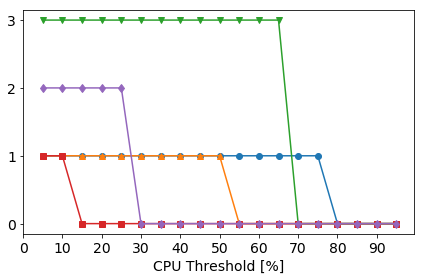

#cpuTh	petclinic	broadleaf	webgoat	ts-security-service	openmrs
5	1	1	3	1	2
10	1	1	3	1	2
15	1	1	3	0	2
20	1	1	3	0	2
25	1	1	3	0	2
30	1	1	3	0	0
35	1	1	3	0	0
40	1	1	3	0	0
45	1	1	3	0	0
50	1	1	3	0	0
55	1	0	3	0	0
60	1	0	3	0	0
65	1	0	3	0	0
70	1	0	0	0	0
75	1	0	0	0	0
80	0	0	0	0	0
85	0	0	0	0	0
90	0	0	0	0	0
95	0	0	0	0	0


In [17]:
LOAD = 25
DURATION = 3
AP = 'CTH'

# Fixed parameters
COUNT_TH = 5
OPTION = 'average'

dfTmp = dfOrig[(dfOrig['load']==LOAD) &
           (dfOrig['duration']==DURATION) &
           (dfOrig['type']==AP) &
           (dfOrig['countTh'] == COUNT_TH) &
           (dfOrig['option'] == OPTION)
          ]

for sys, stl, col in zip(SYSTEMS, STYLES, COLORS):
    plt.plot(dfTmp[dfTmp['system']==sys]['cpuTh'], dfTmp[dfTmp['system']==sys]['foundAP'], stl, color=col, label=sys)
plt.xticks(range(0,100,10), size=FONT_SIZE)
plt.yticks(range(0,max(dfTmp['foundAP'])+1), size=FONT_SIZE)
plt.xlabel('CPU Threshold [%]', size=FONT_SIZE)
# plt.title(str(LOAD) + ' - ' + str(DURATION) + ' | Th(Count) = ' + str(COUNT_TH) + ' | Option = ' + OPTION)
# plt.legend()
plt.tight_layout()
plt.savefig(FOLDER_IMG + str(AP) + '_' + str(LOAD) + '-' + str(DURATION) + '_count' + str(COUNT_TH) + '_opt' + str(OPTION) + '.png')
plt.show()



X_AXIS = 'cpuTh'
HEADER = '#' + X_AXIS + '\t' + '\t'.join(SYSTEMS)
print(HEADER)
for th in range(5,96,5):
    string = str(th) + '\t'
    for sys in SYSTEMS:
        string += str(dfTmp[(dfTmp['system']==sys) & (dfTmp[X_AXIS]==th)]['foundAP'].iloc[0])
        if sys != SYSTEMS[-1]:
            string += '\t'
    print(string)

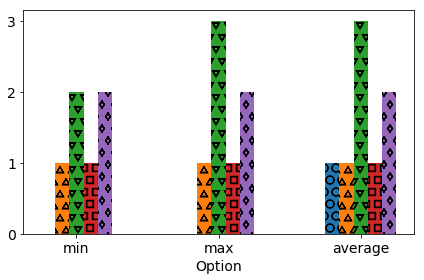

#option	petclinic	broadleaf	webgoat	ts-security-service	openmrs
min	0	1	2	1	2
max	0	1	3	1	2
average	1	1	3	1	2


In [20]:
WIDTH = 0.1

LOAD = 25
DURATION = 3
AP = 'CTH'

# Fixed parameters
COUNT_TH = 5
CPU_TH = 10

dfTmp = dfOrig[(dfOrig['load']==LOAD) &
           (dfOrig['duration']==DURATION) &
           (dfOrig['type']==AP) &
           (dfOrig['countTh'] == COUNT_TH) &
           (dfOrig['cpuTh'] == CPU_TH)
          ]

for sys, stl, col, pos, shade in zip(SYSTEMS, STYLES, COLORS, [-2.5*WIDTH, -1.5*WIDTH, -0.5*WIDTH, 0.5*WIDTH, 1.5*WIDTH], ['O', 't', 'v', 's', 'd']):
    plt.bar([x+pos for x in [0,1,2]], dfTmp[dfTmp['system']==sys]['foundAP'], width=WIDTH, align='edge', color=col, hatch=shade, label=sys)
plt.xticks([0,1,2], dfTmp['option'].unique(), size=FONT_SIZE)
plt.yticks(range(0,max(dfTmp['foundAP'])+1), size=FONT_SIZE)
plt.xlabel('Option', size=FONT_SIZE)
# plt.title(str(LOAD) + ' - ' + str(DURATION) + ' | Th(Count) = ' + str(COUNT_TH) + ' | Th(CPU) = ' + str(CPU_TH))
# plt.legend()
plt.tight_layout()
plt.savefig(FOLDER_IMG + str(AP) + '_' + str(LOAD) + '-' + str(DURATION) + '_cpu' + str(CPU_TH) + '_count' + str(COUNT_TH) + '.png')
plt.show()



X_AXIS = 'option'
HEADER = '#' + X_AXIS + '\t' + '\t'.join(SYSTEMS)
print(HEADER)
for th in ['min', 'max', 'average']:
    string = str(th) + '\t'
    for sys in SYSTEMS:
        string += str(dfTmp[(dfTmp['system']==sys) & (dfTmp[X_AXIS]==th)]['foundAP'].iloc[0])
        if sys != SYSTEMS[-1]:
            string += '\t'
    print(string)

## EP

In [21]:
AP = 'EP'

TIME_TH = 5

for SYSTEM in SYSTEMS:
    print('### ' + SYSTEM + ' ###')
    for LOAD in [25, 50, 75, 100]:
        for DURATION in [3, 6, 12]:
            dfTmp = dfOrig[(dfOrig['load']==LOAD) &
                       (dfOrig['duration']==DURATION) &
                       (dfOrig['type']==AP) &
                       (dfOrig['system']==SYSTEM) &
                       (dfOrig['methodTimeTh']==TIME_TH)
                      ]
            print(str(LOAD) + '-' + str(DURATION) + ' = ' + str(dfTmp['foundAP'].iloc[0]))

### petclinic ###
25-3 = 4
25-6 = 4
25-12 = 4
50-3 = 4
50-6 = 4
50-12 = 4
75-3 = 4
75-6 = 4
75-12 = 4
100-3 = 4
100-6 = 4
100-12 = 4
### broadleaf ###
25-3 = 0
25-6 = 0
25-12 = 0
50-3 = 0
50-6 = 0
50-12 = 0
75-3 = 0
75-6 = 0
75-12 = 0
100-3 = 0
100-6 = 0
100-12 = 0
### webgoat ###
25-3 = 6
25-6 = 6
25-12 = 7
50-3 = 7
50-6 = 7
50-12 = 7
75-3 = 6
75-6 = 7
75-12 = 7
100-3 = 7
100-6 = 7
100-12 = 7
### ts-security-service ###
25-3 = 0
25-6 = 2
25-12 = 2
50-3 = 0
50-6 = 0
50-12 = 2
75-3 = 2
75-6 = 2
75-12 = 2
100-3 = 3
100-6 = 2
100-12 = 2
### openmrs ###
25-3 = 3
25-6 = 0
25-12 = 0
50-3 = 1
50-6 = 1
50-12 = 1
75-3 = 2
75-6 = 2
75-12 = 1
100-3 = 2
100-6 = 1
100-12 = 1


/home/riccardo/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/riccardo/.local/lib/python3.8/site-packages/matplotlib/axes/_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/riccardo/.local/lib/python3.8/site-packages/matplotlib/axes/_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


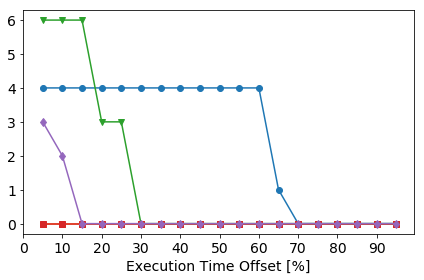

/home/riccardo/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/riccardo/.local/lib/python3.8/site-packages/matplotlib/axes/_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/riccardo/.local/lib/python3.8/site-packages/matplotlib/axes/_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


#methodTimeTh	petclinic	broadleaf	webgoat	ts-security-service	openmrs
5	4	0	6	0	3
10	4	0	6	0	2
15	4	0	6	0	0
20	4	0	3	0	0
25	4	0	3	0	0
30	4	0	0	0	0
35	4	0	0	0	0
40	4	0	0	0	0
45	4	0	0	0	0
50	4	0	0	0	0
55	4	0	0	0	0
60	4	0	0	0	0
65	1	0	0	0	0
70	0	0	0	0	0
75	0	0	0	0	0
80	0	0	0	0	0
85	0	0	0	0	0
90	0	0	0	0	0
95	0	0	0	0	0


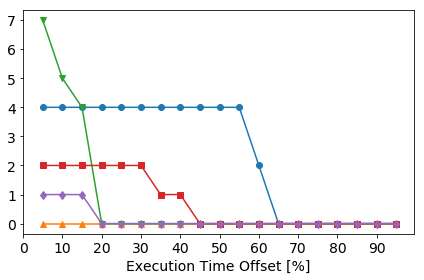

#methodTimeTh	petclinic	broadleaf	webgoat	ts-security-service	openmrs
5	4	0	7	2	1
10	4	0	5	2	1
15	4	0	4	2	1
20	4	0	0	2	0
25	4	0	0	2	0
30	4	0	0	2	0
35	4	0	0	1	0
40	4	0	0	1	0
45	4	0	0	0	0
50	4	0	0	0	0
55	4	0	0	0	0
60	2	0	0	0	0
65	0	0	0	0	0
70	0	0	0	0	0
75	0	0	0	0	0
80	0	0	0	0	0
85	0	0	0	0	0
90	0	0	0	0	0
95	0	0	0	0	0


In [22]:
LOADS = [25, 100]
DURATIONS = [3, 12]
AP = 'EP'

for LOAD, DURATION in zip(LOADS, DURATIONS):
    dfTmp = dfOrig[(dfOrig['load']==LOAD) &
               (dfOrig['duration']==DURATION) &
               (dfOrig['type']==AP)
              ]

    for sys, stl, col in zip(SYSTEMS, STYLES, COLORS):
        plt.plot(dfTmp[dfTmp['system']==sys]['methodTimeTh'], dfTmp[dfTmp['system']==sys]['foundAP'], stl, color=col, label=sys)
    plt.xticks(range(0,100,10), size=FONT_SIZE)
    plt.yticks(range(0,max(dfTmp['foundAP'])+1), size=FONT_SIZE)
    plt.xlabel('Execution Time Offset [%]', size=FONT_SIZE)
    # plt.title(str(LOAD) + ' - ' + str(DURATION))
    # plt.legend()
    plt.tight_layout()
    plt.savefig(FOLDER_IMG + str(AP) + '_' + str(LOAD) + '-' + str(DURATION) + '.png')
    plt.show()
    
    
    
    X_AXIS = 'methodTimeTh'
    HEADER = '#' + X_AXIS + '\t' + '\t'.join(SYSTEMS)
    print(HEADER)
    for th in range(5,96,5):
        string = str(th) + '\t'
        for sys in SYSTEMS:
            string += str(dfTmp[(dfTmp['system']==sys) & (dfTmp[X_AXIS]==th)]['foundAP'].iloc[0])
            if sys != SYSTEMS[-1]:
                string += '\t'
        print(string)

## WCS

In [23]:
AP = 'WCS'

MEM_TH = 5

for SYSTEM in SYSTEMS:
    print('### ' + SYSTEM + ' ###')
    for LOAD in [25, 50, 75, 100]:
        for DURATION in [3, 6, 12]:
            dfTmp = dfOrig[(dfOrig['load']==LOAD) &
                       (dfOrig['duration']==DURATION) &
                       (dfOrig['type']==AP) &
                       (dfOrig['system']==SYSTEM) &
                       (dfOrig['memoryUsageTh']==MEM_TH)
                      ]
            print(str(LOAD) + '-' + str(DURATION) + ' = ' + str(dfTmp['foundAP'].iloc[0]))

### petclinic ###
25-3 = 0
25-6 = 0
25-12 = 1
50-3 = 1
50-6 = 1
50-12 = 1
75-3 = 1
75-6 = 0
75-12 = 1
100-3 = 1
100-6 = 0
100-12 = 1
### broadleaf ###
25-3 = 0
25-6 = 0
25-12 = 0
50-3 = 0
50-6 = 0
50-12 = 0
75-3 = 0
75-6 = 0
75-12 = 0
100-3 = 0
100-6 = 0
100-12 = 0
### webgoat ###
25-3 = 0
25-6 = 0
25-12 = 0
50-3 = 2
50-6 = 1
50-12 = 2
75-3 = 1
75-6 = 2
75-12 = 2
100-3 = 2
100-6 = 2
100-12 = 2
### ts-security-service ###
25-3 = 0
25-6 = 0
25-12 = 0
50-3 = 0
50-6 = 0
50-12 = 0
75-3 = 0
75-6 = 0
75-12 = 0
100-3 = 2
100-6 = 0
100-12 = 0
### openmrs ###
25-3 = 2
25-6 = 0
25-12 = 1
50-3 = 0
50-6 = 0
50-12 = 0
75-3 = 1
75-6 = 1
75-12 = 0
100-3 = 0
100-6 = 0
100-12 = 0


/home/riccardo/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/riccardo/.local/lib/python3.8/site-packages/matplotlib/axes/_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/riccardo/.local/lib/python3.8/site-packages/matplotlib/axes/_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


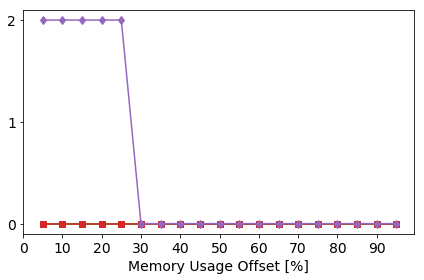

/home/riccardo/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/riccardo/.local/lib/python3.8/site-packages/matplotlib/axes/_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/riccardo/.local/lib/python3.8/site-packages/matplotlib/axes/_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


#memoryUsageTh	petclinic	broadleaf	webgoat	ts-security-service	openmrs
5	0	0	0	0	2
10	0	0	0	0	2
15	0	0	0	0	2
20	0	0	0	0	2
25	0	0	0	0	2
30	0	0	0	0	0
35	0	0	0	0	0
40	0	0	0	0	0
45	0	0	0	0	0
50	0	0	0	0	0
55	0	0	0	0	0
60	0	0	0	0	0
65	0	0	0	0	0
70	0	0	0	0	0
75	0	0	0	0	0
80	0	0	0	0	0
85	0	0	0	0	0
90	0	0	0	0	0
95	0	0	0	0	0


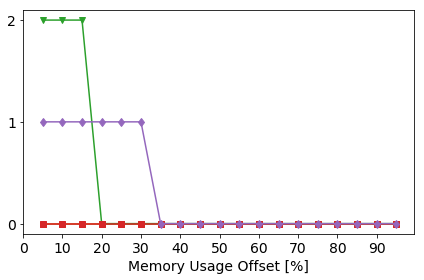

#memoryUsageTh	petclinic	broadleaf	webgoat	ts-security-service	openmrs
5	0	0	2	0	1
10	0	0	2	0	1
15	0	0	2	0	1
20	0	0	0	0	1
25	0	0	0	0	1
30	0	0	0	0	1
35	0	0	0	0	0
40	0	0	0	0	0
45	0	0	0	0	0
50	0	0	0	0	0
55	0	0	0	0	0
60	0	0	0	0	0
65	0	0	0	0	0
70	0	0	0	0	0
75	0	0	0	0	0
80	0	0	0	0	0
85	0	0	0	0	0
90	0	0	0	0	0
95	0	0	0	0	0


In [23]:
LOADS = [25, 75]
DURATIONS = [3, 6]
AP = 'WCS'

for LOAD, DURATION in zip(LOADS, DURATIONS):
    dfTmp = dfOrig[(dfOrig['load']==LOAD) &
               (dfOrig['duration']==DURATION) &
               (dfOrig['type']==AP)
              ]

    for sys, stl, col in zip(SYSTEMS, STYLES, COLORS):
        plt.plot(dfTmp[dfTmp['system']==sys]['memoryUsageTh'], dfTmp[dfTmp['system']==sys]['foundAP'], stl, color=col, label=sys)
    plt.xticks(range(0,100,10), size=FONT_SIZE)
    plt.yticks(range(0,max(dfTmp['foundAP'])+1), size=FONT_SIZE)
    plt.xlabel('Memory Usage Offset [%]', size=FONT_SIZE)
    # plt.title(str(LOAD) + ' - ' + str(DURATION))
    # plt.legend()
    plt.tight_layout()
    plt.savefig(FOLDER_IMG + str(AP) + '_' + str(LOAD) + '-' + str(DURATION) + '.png')
    plt.show()
    
    
    
    X_AXIS = 'memoryUsageTh'
    HEADER = '#' + X_AXIS + '\t' + '\t'.join(SYSTEMS)
    print(HEADER)
    for th in range(5,96,5):
        string = str(th) + '\t'
        for sys in SYSTEMS:
            string += str(dfTmp[(dfTmp['system']==sys) & (dfTmp[X_AXIS]==th)]['foundAP'].iloc[0])
            if sys != SYSTEMS[-1]:
                string += '\t'
        print(string)

## BLOB

In [8]:
AP = 'BLOB'

MSG_TH = 5
CPU_TH = 10
HEAP_TH = 10

for SYSTEM in SYSTEMS:
    print('### ' + SYSTEM + ' ###')
    for LOAD in [25, 50, 75, 100]:
        for DURATION in [3, 6, 12]:
            dfTmp = dfOrig[(dfOrig['load']==LOAD) &
                       (dfOrig['duration']==DURATION) &
                       (dfOrig['type']==AP) &
                       (dfOrig['system']==SYSTEM) &
                       (dfOrig['numMsgs']==MSG_TH) &
                       (dfOrig['cpuTh']==CPU_TH) &
                       (dfOrig['heapTh']==HEAP_TH)
                      ]
            print(str(LOAD) + '-' + str(DURATION) + ' = ' + str(dfTmp['foundAP'].iloc[0]))

### petclinic ###
25-3 = 7
25-6 = 7
25-12 = 7
50-3 = 7
50-6 = 7
50-12 = 7
75-3 = 7
75-6 = 7
75-12 = 7
100-3 = 7
100-6 = 7
100-12 = 7
### broadleaf ###
25-3 = 3
25-6 = 3
25-12 = 2
50-3 = 6
50-6 = 4
50-12 = 4
75-3 = 6
75-6 = 6
75-12 = 7
100-3 = 7
100-6 = 5
100-12 = 6
### webgoat ###
25-3 = 5
25-6 = 5
25-12 = 6
50-3 = 5
50-6 = 5
50-12 = 5
75-3 = 5
75-6 = 5
75-12 = 5
100-3 = 5
100-6 = 5
100-12 = 5
### ts-security-service ###
25-3 = 1
25-6 = 1
25-12 = 1
50-3 = 1
50-6 = 1
50-12 = 1
75-3 = 1
75-6 = 1
75-12 = 1
100-3 = 1
100-6 = 1
100-12 = 1
### openmrs ###
25-3 = 2
25-6 = 1
25-12 = 1
50-3 = 1
50-6 = 1
50-12 = 1
75-3 = 3
75-6 = 3
75-12 = 1
100-3 = 3
100-6 = 1
100-12 = 1


/home/riccardo/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/riccardo/.local/lib/python3.8/site-packages/matplotlib/axes/_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/riccardo/.local/lib/python3.8/site-packages/matplotlib/axes/_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


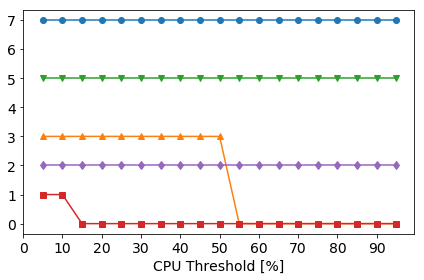

#cpuTh	petclinic	broadleaf	webgoat	ts-security-service	openmrs
5	7	3	5	1	2
10	7	3	5	1	2
15	7	3	5	0	2
20	7	3	5	0	2
25	7	3	5	0	2
30	7	3	5	0	2
35	7	3	5	0	2
40	7	3	5	0	2
45	7	3	5	0	2
50	7	3	5	0	2
55	7	0	5	0	2
60	7	0	5	0	2
65	7	0	5	0	2
70	7	0	5	0	2
75	7	0	5	0	2
80	7	0	5	0	2
85	7	0	5	0	2
90	7	0	5	0	2
95	7	0	5	0	2


In [25]:
LOAD = 25
DURATION = 3
AP = 'BLOB'

# Fixed parameters
HEAP_TH = 10
MSG_TH = 5

dfTmp = dfOrig[(dfOrig['load']==LOAD) &
           (dfOrig['duration']==DURATION) &
           (dfOrig['type']==AP) &
           (dfOrig['heapTh'] == HEAP_TH) &
           (dfOrig['numMsgs'] == MSG_TH)
          ]

for sys, stl, col in zip(SYSTEMS, STYLES, COLORS):
    plt.plot(dfTmp[dfTmp['system']==sys]['cpuTh'], dfTmp[dfTmp['system']==sys]['foundAP'], stl, color=col, label=sys)
plt.xticks(range(0,100,10), size=FONT_SIZE)
plt.yticks(range(0,max(dfTmp['foundAP'])+1), size=FONT_SIZE)
plt.xlabel('CPU Threshold [%]', size=FONT_SIZE)
# plt.title(str(LOAD) + ' - ' + str(DURATION) + ' | Th(Heap) = ' + str(HEAP_TH) + ' | Th(Msgs) = ' + str(MSG_TH))
# plt.legend()
plt.tight_layout()
plt.savefig(FOLDER_IMG + str(AP) + '_' + str(LOAD) + '-' + str(DURATION) + '_heap' + str(HEAP_TH) + '_msg' + str(MSG_TH) + '.png')
plt.show()



X_AXIS = 'cpuTh'
HEADER = '#' + X_AXIS + '\t' + '\t'.join(SYSTEMS)
print(HEADER)
for th in range(5,96,5):
    string = str(th) + '\t'
    for sys in SYSTEMS:
        string += str(dfTmp[(dfTmp['system']==sys) & (dfTmp[X_AXIS]==th)]['foundAP'].iloc[0])
        if sys != SYSTEMS[-1]:
            string += '\t'
    print(string)

/home/riccardo/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/riccardo/.local/lib/python3.8/site-packages/matplotlib/axes/_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/riccardo/.local/lib/python3.8/site-packages/matplotlib/axes/_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


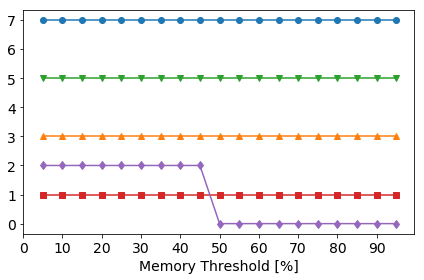

#heapTh	petclinic	broadleaf	webgoat	ts-security-service	openmrs
5	7	3	5	1	2
10	7	3	5	1	2
15	7	3	5	1	2
20	7	3	5	1	2
25	7	3	5	1	2
30	7	3	5	1	2
35	7	3	5	1	2
40	7	3	5	1	2
45	7	3	5	1	2
50	7	3	5	1	0
55	7	3	5	1	0
60	7	3	5	1	0
65	7	3	5	1	0
70	7	3	5	1	0
75	7	3	5	1	0
80	7	3	5	1	0
85	7	3	5	1	0
90	7	3	5	1	0
95	7	3	5	1	0


In [26]:
LOAD = 25
DURATION = 3
AP = 'BLOB'

# Fixed parameters
CPU_TH = 10
MSG_TH = 5

dfTmp = dfOrig[(dfOrig['load']==LOAD) &
           (dfOrig['duration']==DURATION) &
           (dfOrig['type']==AP) &
           (dfOrig['cpuTh'] == CPU_TH) &
           (dfOrig['numMsgs'] == MSG_TH)
          ]

for sys, stl, col in zip(SYSTEMS, STYLES, COLORS):
    plt.plot(dfTmp[dfTmp['system']==sys]['heapTh'], dfTmp[dfTmp['system']==sys]['foundAP'], stl, color=col, label=sys)
plt.xticks(range(0,100,10), size=FONT_SIZE)
plt.yticks(range(0,max(dfTmp['foundAP'])+1), size=FONT_SIZE)
plt.xlabel('Memory Threshold [%]', size=FONT_SIZE)
# plt.title(str(LOAD) + ' - ' + str(DURATION) + ' | Th(CPU) = ' + str(CPU_TH) + ' | Th(Msgs) = ' + str(MSG_TH))
# plt.legend()
plt.tight_layout()
plt.savefig(FOLDER_IMG + str(AP) + '_' + str(LOAD) + '-' + str(DURATION) + '_cpu' + str(CPU_TH) + '_msg' + str(MSG_TH) + '.png')
plt.show()



X_AXIS = 'heapTh'
HEADER = '#' + X_AXIS + '\t' + '\t'.join(SYSTEMS)
print(HEADER)
for th in range(5,96,5):
    string = str(th) + '\t'
    for sys in SYSTEMS:
        string += str(dfTmp[(dfTmp['system']==sys) & (dfTmp[X_AXIS]==th)]['foundAP'].iloc[0])
        if sys != SYSTEMS[-1]:
            string += '\t'
    print(string)

/home/riccardo/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/riccardo/.local/lib/python3.8/site-packages/matplotlib/axes/_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/riccardo/.local/lib/python3.8/site-packages/matplotlib/axes/_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


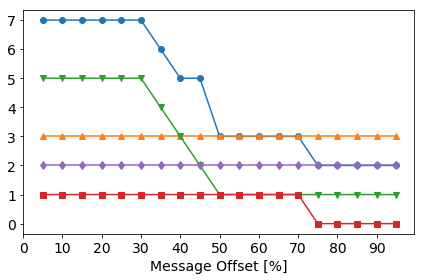

#numMsgs	petclinic	broadleaf	webgoat	ts-security-service	openmrs
5	7	3	5	1	2
10	7	3	5	1	2
15	7	3	5	1	2
20	7	3	5	1	2
25	7	3	5	1	2
30	7	3	5	1	2
35	6	3	4	1	2
40	5	3	3	1	2
45	5	3	2	1	2
50	3	3	1	1	2
55	3	3	1	1	2
60	3	3	1	1	2
65	3	3	1	1	2
70	3	3	1	1	2
75	2	3	1	0	2
80	2	3	1	0	2
85	2	3	1	0	2
90	2	3	1	0	2
95	2	3	1	0	2


In [27]:
LOAD = 25
DURATION = 3
AP = 'BLOB'

# Fixed parameters
CPU_TH = 10
HEAP_TH = 10

dfTmp = dfOrig[(dfOrig['load']==LOAD) &
           (dfOrig['duration']==DURATION) &
           (dfOrig['type']==AP) &
           (dfOrig['cpuTh'] == CPU_TH) &
           (dfOrig['heapTh'] == HEAP_TH)
          ]

for sys, stl, col in zip(SYSTEMS, STYLES, COLORS):
    plt.plot(dfTmp[dfTmp['system']==sys]['numMsgs'], dfTmp[dfTmp['system']==sys]['foundAP'], stl, color=col, label=sys)
plt.xticks(range(0,100,10), size=FONT_SIZE)
plt.yticks(range(0,max(dfTmp['foundAP'])+1), size=FONT_SIZE)
plt.xlabel('Message Offset [%]', size=FONT_SIZE)
# plt.title(str(LOAD) + ' - ' + str(DURATION) + ' | Th(CPU) = ' + str(CPU_TH) + ' | Th(Heap) = ' + str(HEAP_TH))
# plt.legend()
plt.tight_layout()
plt.savefig(FOLDER_IMG + str(AP) + '_' + str(LOAD) + '-' + str(DURATION) + '_cpu' + str(CPU_TH) + '_heap' + str(HEAP_TH) + '.png')
plt.show()



X_AXIS = 'numMsgs'
HEADER = '#' + X_AXIS + '\t' + '\t'.join(SYSTEMS)
print(HEADER)
for th in range(5,96,5):
    string = str(th) + '\t'
    for sys in SYSTEMS:
        string += str(dfTmp[(dfTmp['system']==sys) & (dfTmp[X_AXIS]==th)]['foundAP'].iloc[0])
        if sys != SYSTEMS[-1]:
            string += '\t'
    print(string)

## TOB

In [29]:
AP = 'TOB'

TIME_TH = 5

for SYSTEM in SYSTEMS:
    print('### ' + SYSTEM + ' ###')
    for LOAD in [25, 50, 75, 100]:
        for DURATION in [3, 6, 12]:
            dfTmp = dfOrig[(dfOrig['load']==LOAD) &
                       (dfOrig['duration']==DURATION) &
                       (dfOrig['type']==AP) &
                       (dfOrig['system']==SYSTEM) &
                       (dfOrig['methodTimeTh']==TIME_TH)
                      ]
            print(str(LOAD) + '-' + str(DURATION) + ' = ' + str(dfTmp['foundAP'].iloc[0]))

### petclinic ###
25-3 = 2
25-6 = 2
25-12 = 2
50-3 = 2
50-6 = 2
50-12 = 2
75-3 = 2
75-6 = 2
75-12 = 2
100-3 = 2
100-6 = 2
100-12 = 2
### broadleaf ###
25-3 = 0
25-6 = 0
25-12 = 0
50-3 = 0
50-6 = 0
50-12 = 0
75-3 = 0
75-6 = 0
75-12 = 0
100-3 = 0
100-6 = 0
100-12 = 0
### webgoat ###
25-3 = 4
25-6 = 4
25-12 = 4
50-3 = 4
50-6 = 4
50-12 = 4
75-3 = 4
75-6 = 4
75-12 = 4
100-3 = 4
100-6 = 4
100-12 = 4
### ts-security-service ###
25-3 = 0
25-6 = 0
25-12 = 0
50-3 = 0
50-6 = 0
50-12 = 0
75-3 = 0
75-6 = 0
75-12 = 0
100-3 = 0
100-6 = 0
100-12 = 0
### openmrs ###
25-3 = 0
25-6 = 0
25-12 = 0
50-3 = 0
50-6 = 0
50-12 = 0
75-3 = 0
75-6 = 0
75-12 = 0
100-3 = 0
100-6 = 0
100-12 = 0


/home/riccardo/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/riccardo/.local/lib/python3.8/site-packages/matplotlib/axes/_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/riccardo/.local/lib/python3.8/site-packages/matplotlib/axes/_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


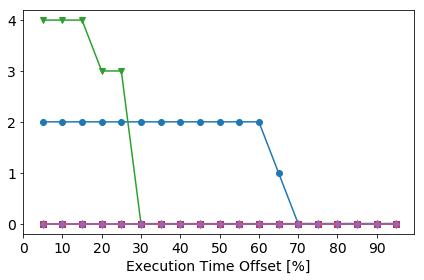

/home/riccardo/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/riccardo/.local/lib/python3.8/site-packages/matplotlib/axes/_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/riccardo/.local/lib/python3.8/site-packages/matplotlib/axes/_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


#methodTimeTh	petclinic	broadleaf	webgoat	ts-security-service	openmrs
5	2	0	4	0	0
10	2	0	4	0	0
15	2	0	4	0	0
20	2	0	3	0	0
25	2	0	3	0	0
30	2	0	0	0	0
35	2	0	0	0	0
40	2	0	0	0	0
45	2	0	0	0	0
50	2	0	0	0	0
55	2	0	0	0	0
60	2	0	0	0	0
65	1	0	0	0	0
70	0	0	0	0	0
75	0	0	0	0	0
80	0	0	0	0	0
85	0	0	0	0	0
90	0	0	0	0	0
95	0	0	0	0	0


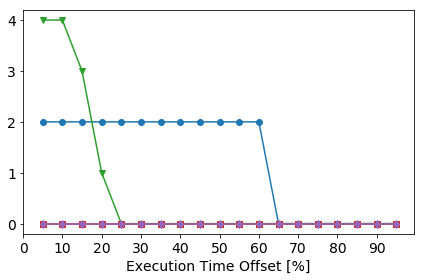

#methodTimeTh	petclinic	broadleaf	webgoat	ts-security-service	openmrs
5	2	0	4	0	0
10	2	0	4	0	0
15	2	0	3	0	0
20	2	0	1	0	0
25	2	0	0	0	0
30	2	0	0	0	0
35	2	0	0	0	0
40	2	0	0	0	0
45	2	0	0	0	0
50	2	0	0	0	0
55	2	0	0	0	0
60	2	0	0	0	0
65	0	0	0	0	0
70	0	0	0	0	0
75	0	0	0	0	0
80	0	0	0	0	0
85	0	0	0	0	0
90	0	0	0	0	0
95	0	0	0	0	0


In [24]:
LOADS = [25, 50]
DURATIONS = [3, 3]
AP = 'TOB'

for LOAD, DURATION in zip(LOADS, DURATIONS):
    dfTmp = dfOrig[(dfOrig['load']==LOAD) &
               (dfOrig['duration']==DURATION) &
               (dfOrig['type']==AP)
              ]

    for sys, stl, col in zip(SYSTEMS, STYLES, COLORS):
        plt.plot(dfTmp[dfTmp['system']==sys]['methodTimeTh'], dfTmp[dfTmp['system']==sys]['foundAP'], stl, color=col, label=sys)
    plt.xticks(range(0,100,10), size=FONT_SIZE)
    plt.yticks(range(0,max(dfTmp['foundAP'])+1), size=FONT_SIZE)
    plt.xlabel('Execution Time Offset [%]', size=FONT_SIZE)
    # plt.title(str(LOAD) + ' - ' + str(DURATION))
    # plt.legend()
    plt.tight_layout()
    plt.savefig(FOLDER_IMG + str(AP) + '_' + str(LOAD) + '-' + str(DURATION) + '.png')
    plt.show()
    
    
    
    X_AXIS = 'methodTimeTh'
    HEADER = '#' + X_AXIS + '\t' + '\t'.join(SYSTEMS)
    print(HEADER)
    for th in range(5,96,5):
        string = str(th) + '\t'
        for sys in SYSTEMS:
            string += str(dfTmp[(dfTmp['system']==sys) & (dfTmp[X_AXIS]==th)]['foundAP'].iloc[0])
            if sys != SYSTEMS[-1]:
                string += '\t'
        print(string)

# Original vs. Refactored: OpenMRS

## CTH

In [16]:
AP = 'CTH'

COUNT_TH = 5
CPU_TH = 10
OPTION = 'average'

for SYSTEM in ['openmrs']:
    print('### ' + SYSTEM + ' ###')
    for LOAD in [25, 50, 75, 100]:
        for DURATION in [3, 6, 12]:
            dfTmpO = dfOrig[(dfOrig['load']==LOAD) &
                       (dfOrig['duration']==DURATION) &
                       (dfOrig['type']==AP) &
                       (dfOrig['system']==SYSTEM) &
                       (dfOrig['countTh']==COUNT_TH) &
                       (dfOrig['cpuTh']==CPU_TH) &
                       (dfOrig['option']==OPTION)
                    ]
            dfTmpR = dfRef[(dfRef['load']==LOAD) &
                       (dfRef['duration']==DURATION) &
                       (dfRef['type']==AP) &
                       (dfRef['system']==SYSTEM) &
                       (dfRef['countTh']==COUNT_TH) &
                       (dfRef['cpuTh']==CPU_TH) &
                       (dfRef['option']==OPTION)
                      ]
            diff = dfTmpR['foundAP'].iloc[0] - dfTmpO['foundAP'].iloc[0]
            print(str(LOAD) + '-' + str(DURATION) + ' = ' + str(dfTmpR['foundAP'].iloc[0]) + '(' + str(diff) + ')')

### openmrs ###
25-3 = 0(-2)
25-6 = 0(0)
25-12 = 0(0)
50-3 = 0(0)
50-6 = 0(0)
50-12 = 0(0)
75-3 = 0(-1)
75-6 = 0(-1)
75-12 = 0(0)
100-3 = 1(1)
100-6 = 0(0)
100-12 = 0(0)


/home/riccardo/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/riccardo/.local/lib/python3.8/site-packages/matplotlib/axes/_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/riccardo/.local/lib/python3.8/site-packages/matplotlib/axes/_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


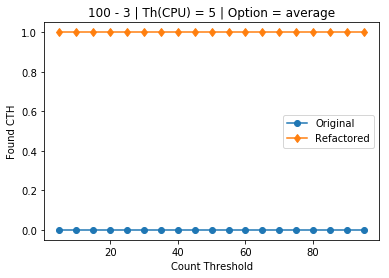

In [16]:
LOAD = 100
DURATION = 3
AP = 'CTH'
SYSTEM = 'openmrs'

# Fixed parameters
CPU_TH = 5
OPTION = 'average'

# X-axis parameter
X_PARAM = 'countTh'

dfTmpOrig = dfOrig[(dfOrig['load']==LOAD) &
           (dfOrig['duration']==DURATION) &
           (dfOrig['system']==SYSTEM) &
           (dfOrig['type']==AP) &
           (dfOrig['cpuTh'] == CPU_TH) &
           (dfOrig['option'] == OPTION)
          ]

dfTmpRef = dfRef[(dfRef['load']==LOAD) &
           (dfRef['duration']==DURATION) &
           (dfRef['system']==SYSTEM) &
           (dfRef['type']==AP) &
           (dfRef['cpuTh'] == CPU_TH) &
           (dfRef['option'] == OPTION)
          ]

plt.plot(dfTmpOrig[X_PARAM], dfTmpOrig['foundAP'], '-o', label='Original')
plt.plot(dfTmpRef[X_PARAM], dfTmpRef['foundAP'], '-d', label='Refactored')
plt.xlabel('Count Threshold')
plt.ylabel('Found ' + AP)
plt.title(str(LOAD) + ' - ' + str(DURATION) + ' | Th(CPU) = ' + str(CPU_TH) + ' | Option = ' + OPTION)
plt.legend()
plt.show()

/home/riccardo/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/riccardo/.local/lib/python3.8/site-packages/matplotlib/axes/_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/riccardo/.local/lib/python3.8/site-packages/matplotlib/axes/_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


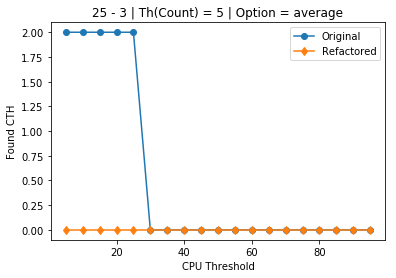

In [146]:
LOAD = 25
DURATION = 3
AP = 'CTH'
SYSTEM = 'openmrs'

# Fixed parameters
COUNT_TH = 5
OPTION = 'average'

# X-axis parameter
X_PARAM = 'cpuTh'

dfTmpOrig = dfOrig[(dfOrig['load']==LOAD) &
           (dfOrig['duration']==DURATION) &
           (dfOrig['system']==SYSTEM) &
           (dfOrig['type']==AP) &
           (dfOrig['countTh'] == COUNT_TH) &
           (dfOrig['option'] == OPTION)
          ]

dfTmpRef = dfRef[(dfRef['load']==LOAD) &
           (dfRef['duration']==DURATION) &
           (dfRef['system']==SYSTEM) &
           (dfRef['type']==AP) &
           (dfRef['countTh'] == COUNT_TH) &
           (dfRef['option'] == OPTION)
          ]

plt.plot(dfTmpOrig[X_PARAM], dfTmpOrig['foundAP'], '-o', label='Original')
plt.plot(dfTmpRef[X_PARAM], dfTmpRef['foundAP'], '-d', label='Refactored')
plt.xlabel('CPU Threshold')
plt.ylabel('Found ' + AP)
plt.title(str(LOAD) + ' - ' + str(DURATION) + ' | Th(Count) = ' + str(COUNT_TH) + ' | Option = ' + OPTION)
plt.legend()
plt.show()

/home/riccardo/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/riccardo/.local/lib/python3.8/site-packages/matplotlib/axes/_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/riccardo/.local/lib/python3.8/site-packages/matplotlib/axes/_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


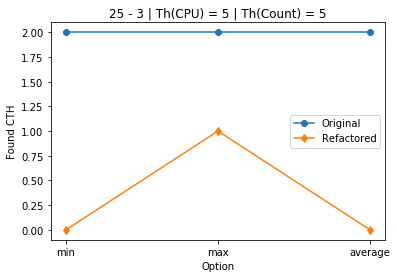

In [111]:
LOAD = 25
DURATION = 3
AP = 'CTH'
SYSTEM = 'openmrs'

# Fixed parameters
CPU_TH = 5
COUNT_TH = 5

# X-axis parameter
X_PARAM = 'option'

dfTmpOrig = dfOrig[(dfOrig['load']==LOAD) &
           (dfOrig['duration']==DURATION) &
           (dfOrig['system']==SYSTEM) &
           (dfOrig['type']==AP) &
           (dfOrig['cpuTh'] == CPU_TH) &
           (dfOrig['countTh'] == COUNT_TH)
          ]

dfTmpRef = dfRef[(dfRef['load']==LOAD) &
           (dfRef['duration']==DURATION) &
           (dfRef['system']==SYSTEM) &
           (dfRef['type']==AP) &
           (dfRef['cpuTh'] == CPU_TH) &
           (dfRef['countTh'] == COUNT_TH)
          ]

plt.plot(dfTmpOrig[X_PARAM], dfTmpOrig['foundAP'], '-o', label='Original')
plt.plot(dfTmpRef[X_PARAM], dfTmpRef['foundAP'], '-d', label='Refactored')
plt.xlabel('Option')
plt.ylabel('Found ' + AP)
plt.title(str(LOAD) + ' - ' + str(DURATION) + ' | Th(CPU) = ' + str(CPU_TH) + ' | Th(Count) = ' + str(COUNT_TH))
plt.legend()
plt.show()

## EP

In [17]:
AP = 'EP'

TIME_TH = 5

for SYSTEM in ['openmrs']:
    print('### ' + SYSTEM + ' ###')
    for LOAD in [25, 50, 75, 100]:
        for DURATION in [3, 6, 12]:
            dfTmpO = dfOrig[(dfOrig['load']==LOAD) &
                       (dfOrig['duration']==DURATION) &
                       (dfOrig['type']==AP) &
                       (dfOrig['system']==SYSTEM) &
                       (dfOrig['methodTimeTh']==TIME_TH)
                      ]
            dfTmpR = dfRef[(dfRef['load']==LOAD) &
                       (dfRef['duration']==DURATION) &
                       (dfRef['type']==AP) &
                       (dfRef['system']==SYSTEM) &
                       (dfRef['methodTimeTh']==TIME_TH)
                      ]
            diff = dfTmpR['foundAP'].iloc[0] - dfTmpO['foundAP'].iloc[0]
            print(str(LOAD) + '-' + str(DURATION) + ' = ' + str(dfTmpR['foundAP'].iloc[0]) + '(' + str(diff) + ')')

### openmrs ###
25-3 = 2(-1)
25-6 = 1(1)
25-12 = 1(1)
50-3 = 1(0)
50-6 = 1(0)
50-12 = 1(0)
75-3 = 1(-1)
75-6 = 2(0)
75-12 = 1(0)
100-3 = 2(0)
100-6 = 1(0)
100-12 = 1(0)


/home/riccardo/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/riccardo/.local/lib/python3.8/site-packages/matplotlib/axes/_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/riccardo/.local/lib/python3.8/site-packages/matplotlib/axes/_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


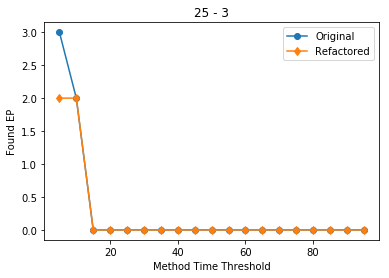

In [21]:
LOAD = 25
DURATION = 3
AP = 'EP'
SYSTEM = 'openmrs'

# X-axis parameter
X_PARAM = 'methodTimeTh'

dfTmpOrig = dfOrig[(dfOrig['load']==LOAD) &
           (dfOrig['duration']==DURATION) &
           (dfOrig['system']==SYSTEM) &
           (dfOrig['type']==AP)
          ]

dfTmpRef = dfRef[(dfRef['load']==LOAD) &
           (dfRef['duration']==DURATION) &
           (dfRef['system']==SYSTEM) &
           (dfRef['type']==AP)
          ]

plt.plot(dfTmpOrig[X_PARAM], dfTmpOrig['foundAP'], '-o', label='Original')
plt.plot(dfTmpRef[X_PARAM], dfTmpRef['foundAP'], '-d', label='Refactored')
plt.xlabel('Method Time Threshold')
plt.ylabel('Found ' + AP)
plt.title(str(LOAD) + ' - ' + str(DURATION))
plt.legend()
plt.show()

## WCS

In [18]:
AP = 'WCS'

MEM_TH = 5

for SYSTEM in ['openmrs']:
    print('### ' + SYSTEM + ' ###')
    for LOAD in [25, 50, 75, 100]:
        for DURATION in [3, 6, 12]:
            dfTmpO = dfOrig[(dfOrig['load']==LOAD) &
                       (dfOrig['duration']==DURATION) &
                       (dfOrig['type']==AP) &
                       (dfOrig['system']==SYSTEM) &
                       (dfOrig['memoryUsageTh']==MEM_TH)
                      ]
            dfTmpR = dfRef[(dfRef['load']==LOAD) &
                       (dfRef['duration']==DURATION) &
                       (dfRef['type']==AP) &
                       (dfRef['system']==SYSTEM) &
                       (dfRef['memoryUsageTh']==MEM_TH)
                      ]
            diff = dfTmpR['foundAP'].iloc[0] - dfTmpO['foundAP'].iloc[0]
            print(str(LOAD) + '-' + str(DURATION) + ' = ' + str(dfTmpR['foundAP'].iloc[0]) + '(' + str(diff) + ')')

### openmrs ###
25-3 = 0(-2)
25-6 = 0(0)
25-12 = 0(-1)
50-3 = 0(0)
50-6 = 0(0)
50-12 = 0(0)
75-3 = 0(-1)
75-6 = 0(-1)
75-12 = 0(0)
100-3 = 1(1)
100-6 = 0(0)
100-12 = 0(0)


/home/riccardo/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/riccardo/.local/lib/python3.8/site-packages/matplotlib/axes/_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/riccardo/.local/lib/python3.8/site-packages/matplotlib/axes/_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


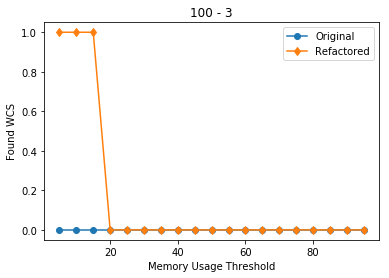

In [22]:
LOAD = 100
DURATION = 3
AP = 'WCS'
SYSTEM = 'openmrs'

# X-axis parameter
X_PARAM = 'memoryUsageTh'

dfTmpOrig = dfOrig[(dfOrig['load']==LOAD) &
           (dfOrig['duration']==DURATION) &
           (dfOrig['system']==SYSTEM) &
           (dfOrig['type']==AP)
          ]

dfTmpRef = dfRef[(dfRef['load']==LOAD) &
           (dfRef['duration']==DURATION) &
           (dfRef['system']==SYSTEM) &
           (dfRef['type']==AP)
          ]

plt.plot(dfTmpOrig[X_PARAM], dfTmpOrig['foundAP'], '-o', label='Original')
plt.plot(dfTmpRef[X_PARAM], dfTmpRef['foundAP'], '-d', label='Refactored')
plt.xlabel('Memory Usage Threshold')
plt.ylabel('Found ' + AP)
plt.title(str(LOAD) + ' - ' + str(DURATION))
plt.legend()
plt.show()

## BLOB

In [19]:
AP = 'BLOB'

MSG_TH = 5
CPU_TH = 10
HEAP_TH = 10

for SYSTEM in ['openmrs']:
    print('### ' + SYSTEM + ' ###')
    for LOAD in [25, 50, 75, 100]:
        for DURATION in [3, 6, 12]:
            dfTmpO = dfOrig[(dfOrig['load']==LOAD) &
                       (dfOrig['duration']==DURATION) &
                       (dfOrig['type']==AP) &
                       (dfOrig['system']==SYSTEM) &
                       (dfOrig['numMsgs']==MSG_TH) &
                       (dfOrig['cpuTh']==CPU_TH) &
                       (dfOrig['heapTh']==HEAP_TH)
                      ]
            dfTmpR = dfRef[(dfRef['load']==LOAD) &
                       (dfRef['duration']==DURATION) &
                       (dfRef['type']==AP) &
                       (dfRef['system']==SYSTEM) &
                       (dfRef['numMsgs']==MSG_TH) &
                       (dfRef['cpuTh']==CPU_TH) &
                       (dfRef['heapTh']==HEAP_TH)
                      ]
            diff = dfTmpR['foundAP'].iloc[0] - dfTmpO['foundAP'].iloc[0]
            print(str(LOAD) + '-' + str(DURATION) + ' = ' + str(dfTmpR['foundAP'].iloc[0]) + '(' + str(diff) + ')')

### openmrs ###
25-3 = 3(1)
25-6 = 1(0)
25-12 = 1(0)
50-3 = 1(0)
50-6 = 1(0)
50-12 = 1(0)
75-3 = 1(-2)
75-6 = 3(0)
75-12 = 1(0)
100-3 = 2(-1)
100-6 = 1(0)
100-12 = 1(0)


/home/riccardo/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/riccardo/.local/lib/python3.8/site-packages/matplotlib/axes/_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/riccardo/.local/lib/python3.8/site-packages/matplotlib/axes/_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


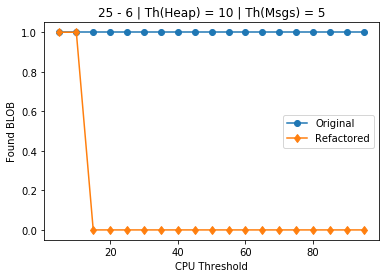

In [38]:
LOAD = 25
DURATION = 6
SYSTEM = 'openmrs'
AP = 'BLOB'

# Fixed parameters
HEAP_TH = 10
MSG_TH = 5

# X-axis parameter
X_PARAM = 'cpuTh'

dfTmpOrig = dfOrig[(dfOrig['load']==LOAD) &
           (dfOrig['duration']==DURATION) &
           (dfOrig['system']==SYSTEM) &
           (dfOrig['type']==AP) &
           (dfOrig['heapTh'] == HEAP_TH) &
           (dfOrig['numMsgs'] == MSG_TH)
          ]

dfTmpRef = dfRef[(dfRef['load']==LOAD) &
           (dfRef['duration']==DURATION) &
           (dfRef['system']==SYSTEM) &
           (dfRef['type']==AP) &
           (dfRef['heapTh'] == HEAP_TH) &
           (dfRef['numMsgs'] == MSG_TH)
          ]

plt.plot(dfTmpOrig[X_PARAM], dfTmpOrig['foundAP'], '-o', label='Original')
plt.plot(dfTmpRef[X_PARAM], dfTmpRef['foundAP'], '-d', label='Refactored')
plt.xlabel('CPU Threshold')
plt.ylabel('Found ' + AP)
plt.title(str(LOAD) + ' - ' + str(DURATION) + ' | Th(Heap) = ' + str(HEAP_TH) + ' | Th(Msgs) = ' + str(MSG_TH))
plt.legend()
plt.show()

/home/riccardo/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/riccardo/.local/lib/python3.8/site-packages/matplotlib/axes/_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/riccardo/.local/lib/python3.8/site-packages/matplotlib/axes/_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


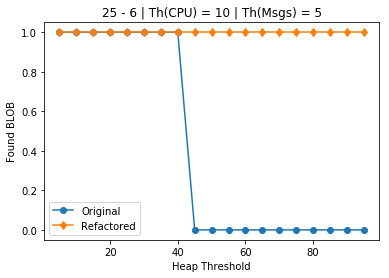

In [39]:
LOAD = 25
DURATION = 6
SYSTEM = 'openmrs'
AP = 'BLOB'

# Fixed parameters
CPU_TH = 10
MSG_TH = 5

# X-axis parameter
X_PARAM = 'heapTh'

dfTmpOrig = dfOrig[(dfOrig['load']==LOAD) &
           (dfOrig['duration']==DURATION) &
           (dfOrig['system']==SYSTEM) &
           (dfOrig['type']==AP) &
           (dfOrig['cpuTh'] == CPU_TH) &
           (dfOrig['numMsgs'] == MSG_TH)
          ]

dfTmpRef = dfRef[(dfRef['load']==LOAD) &
           (dfRef['duration']==DURATION) &
           (dfRef['system']==SYSTEM) &
           (dfRef['type']==AP) &
           (dfRef['cpuTh'] == CPU_TH) &
           (dfRef['numMsgs'] == MSG_TH)
          ]

plt.plot(dfTmpOrig[X_PARAM], dfTmpOrig['foundAP'], '-o', label='Original')
plt.plot(dfTmpRef[X_PARAM], dfTmpRef['foundAP'], '-d', label='Refactored')
plt.xlabel('Heap Threshold')
plt.ylabel('Found ' + AP)
plt.title(str(LOAD) + ' - ' + str(DURATION) + ' | Th(CPU) = ' + str(CPU_TH) + ' | Th(Msgs) = ' + str(MSG_TH))
plt.legend()
plt.show()

/home/riccardo/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/riccardo/.local/lib/python3.8/site-packages/matplotlib/axes/_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/riccardo/.local/lib/python3.8/site-packages/matplotlib/axes/_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


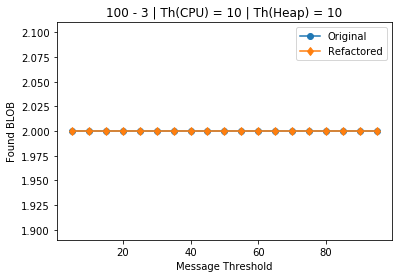

In [52]:
LOAD = 100
DURATION = 3
SYSTEM = 'openmrs'
AP = 'BLOB'

# Fixed parameters
CPU_TH = 10
HEAP_TH = 10

# X-axis parameter
X_PARAM = 'numMsgs'

dfTmpOrig = dfOrig[(dfOrig['load']==LOAD) &
           (dfOrig['duration']==DURATION) &
           (dfOrig['system']==SYSTEM) &
           (dfOrig['type']==AP) &
           (dfOrig['cpuTh'] == CPU_TH) &
           (dfOrig['heapTh'] == HEAP_TH)
          ]

dfTmpRef = dfRef[(dfRef['load']==LOAD) &
           (dfRef['duration']==DURATION) &
           (dfRef['system']==SYSTEM) &
           (dfRef['type']==AP) &
           (dfRef['cpuTh'] == CPU_TH) &
           (dfRef['heapTh'] == HEAP_TH)
          ]

plt.plot(dfTmpOrig[X_PARAM], dfTmpOrig['foundAP'], '-o', label='Original')
plt.plot(dfTmpRef[X_PARAM], dfTmpRef['foundAP'], '-d', label='Refactored')
plt.xlabel('Message Threshold')
plt.ylabel('Found ' + AP)
plt.title(str(LOAD) + ' - ' + str(DURATION) + ' | Th(CPU) = ' + str(CPU_TH) + ' | Th(Heap) = ' + str(HEAP_TH))
plt.legend()
plt.show()

## TOB

In [20]:
AP = 'TOB'

TIME_TH = 5

for SYSTEM in ['openmrs']:
    print('### ' + SYSTEM + ' ###')
    for LOAD in [25, 50, 75, 100]:
        for DURATION in [3, 6, 12]:
            dfTmpO = dfOrig[(dfOrig['load']==LOAD) &
                       (dfOrig['duration']==DURATION) &
                       (dfOrig['type']==AP) &
                       (dfOrig['system']==SYSTEM) &
                       (dfOrig['methodTimeTh']==TIME_TH)
                      ]
            dfTmpR = dfRef[(dfRef['load']==LOAD) &
                       (dfRef['duration']==DURATION) &
                       (dfRef['type']==AP) &
                       (dfRef['system']==SYSTEM) &
                       (dfRef['methodTimeTh']==TIME_TH)
                      ]
            diff = dfTmpR['foundAP'].iloc[0] - dfTmpO['foundAP'].iloc[0]
            print(str(LOAD) + '-' + str(DURATION) + ' = ' + str(dfTmpR['foundAP'].iloc[0]) + '(' + str(diff) + ')')

### openmrs ###
25-3 = 0(0)
25-6 = 0(0)
25-12 = 0(0)
50-3 = 0(0)
50-6 = 0(0)
50-12 = 0(0)
75-3 = 0(0)
75-6 = 0(0)
75-12 = 0(0)
100-3 = 0(0)
100-6 = 0(0)
100-12 = 0(0)


/home/riccardo/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/riccardo/.local/lib/python3.8/site-packages/matplotlib/axes/_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/riccardo/.local/lib/python3.8/site-packages/matplotlib/axes/_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


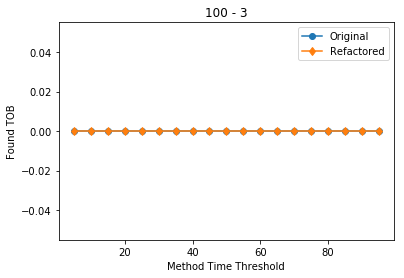

In [64]:
LOAD = 100
DURATION = 3
AP = 'TOB'
SYSTEM = 'openmrs'

# X-axis parameter
X_PARAM = 'methodTimeTh'

dfTmpOrig = dfOrig[(dfOrig['load']==LOAD) &
           (dfOrig['duration']==DURATION) &
           (dfOrig['system']==SYSTEM) &
           (dfOrig['type']==AP)
          ]

dfTmpRef = dfRef[(dfRef['load']==LOAD) &
           (dfRef['duration']==DURATION) &
           (dfRef['system']==SYSTEM) &
           (dfRef['type']==AP)
          ]

plt.plot(dfTmpOrig[X_PARAM], dfTmpOrig['foundAP'], '-o', label='Original')
plt.plot(dfTmpRef[X_PARAM], dfTmpRef['foundAP'], '-d', label='Refactored')
plt.xlabel('Method Time Threshold')
plt.ylabel('Found ' + AP)
plt.title(str(LOAD) + ' - ' + str(DURATION))
plt.legend()
plt.show()